In [1]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  FIPS state codes are numeric and two-letter alphabetic codes defined in U.S. Federal Information Processing Standard Publication ("FIPS PUB") 5-2 to identify U.S. states.

temperature_rate = pd.read_csv("../data/model_state.csv")
temperature_rate.head()

,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,state_code,state_name,gnis_id
0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775
1,4,1.203951,1.384480,1.274455,1.388388,Winter,1.319880,AZ,Arizona,1779777
2,5,-0.042540,0.266399,0.058596,0.532247,Winter,0.214074,AR,Arkansas,68085
3,6,1.570921,1.449242,1.478335,1.412430,Fall,1.480561,CA,California,1779778
4,8,1.055309,1.436910,1.367845,1.838758,Winter,1.438589,CO,Colorado,1779779


In [3]:
# Reference DF with US Federal Information Processing Standard state code and name

state_fips_code = temperature_rate[['fips','state_name']]
state_fips_code.head()

,fips,state_name
0,1,Alabama
1,4,Arizona
2,5,Arkansas
3,6,California
4,8,Colorado


In [6]:
# Proess user input state

selected_state = input("Please choose the state you are analyzing").title()
if ((selected_state == 'Hawaii') | (selected_state == 'Alaska')):
    print(f"Sorry. At the moment, We are not able to track weather data for the states Hawaii and Alaska. Enter any other US state")
index=state_fips_code.loc[state_fips_code['state_name'] == selected_state]

if ((selected_state != 'Hawaii') and (selected_state != 'Alaska')):
    if index.empty:
        print(f"No match for state {selected_state}. Please re-enter the state")
        selected_state =''
    else:
        print(f"Processing data for {selected_state}")

Please choose the state you are analyzing Hawaii


Sorry. At the moment, We are not able to track weather data for the states Hawaii and Alaska. Enter any other US state


In [9]:
# This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999.

mortality_rate = pd.read_csv("../data/mortality_rate_by_US_state.csv")
mortality_rate.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [12]:
# Load climate data by US State FIPS code along with the merged state name for the fips

climate_change_raw = pd.read_csv("../data/climdiv_state_year.csv").merge(state_fips_code)
climate_change_raw.head()

,fips,year,temp,tempc,state_name
0,1,1895,61.641667,16.467593,Alabama
1,1,1896,64.266667,17.925926,Alabama
2,1,1897,64.191667,17.884259,Alabama
3,1,1898,62.983333,17.212963,Alabama
4,1,1899,63.100000,17.277778,Alabama


In [31]:
# Identify the mortality data by cause "cancer" to analyze temperature as a cause

cancer_rate = mortality_rate.loc[mortality_rate["Cause Name"]=="Cancer"]
cancer_rate = cancer_rate.rename(columns={"Year":"year"})
cancer_rate

,year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1923,2016,Malignant neoplasms (C00-C97),Cancer,Alabama,10419,174.0
1924,2015,Malignant neoplasms (C00-C97),Cancer,Alabama,10354,175.6
1925,2014,Malignant neoplasms (C00-C97),Cancer,Alabama,10286,177.6
1926,2013,Malignant neoplasms (C00-C97),Cancer,Alabama,10328,182.2
1927,2012,Malignant neoplasms (C00-C97),Cancer,Alabama,10276,185.2
...,...,...,...,...,...,...
2854,2003,Malignant neoplasms (C00-C97),Cancer,Wyoming,943,188.9
2855,2002,Malignant neoplasms (C00-C97),Cancer,Wyoming,859,177.1
2856,2001,Malignant neoplasms (C00-C97),Cancer,Wyoming,923,194.0
2857,2000,Malignant neoplasms (C00-C97),Cancer,Wyoming,868,185.5


In [32]:
cancer_df = cancer_rate.loc[(cancer_rate["year"]>1999) & (cancer_rate["State"]==selected_state)]
cancer_df.head()

,year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
2085,2016,Malignant neoplasms (C00-C97),Cancer,Florida,44266,146.9
2086,2015,Malignant neoplasms (C00-C97),Cancer,Florida,44027,150.6
2087,2014,Malignant neoplasms (C00-C97),Cancer,Florida,43212,152.9
2088,2013,Malignant neoplasms (C00-C97),Cancer,Florida,42735,155.9
2089,2012,Malignant neoplasms (C00-C97),Cancer,Florida,42188,158.8


In [100]:
# cancer_df = cancer_rate.loc[(cancer_rate["year"]>1999) & (cancer_rate["State"]=="Colorado")]
# cancer_df

In [33]:
climate_df =climate_change.loc[(climate_change["year"]>1999) & (climate_change["year"]<2017) & (climate_change["state_name"]==selected_state)]
climate_df

,fips,year,temp,tempc,state_name
980,12,2000,70.575000,21.430556,Florida
981,12,2001,70.933333,21.629630,Florida
982,12,2002,71.291667,21.828704,Florida
983,12,2003,70.866667,21.592593,Florida
984,12,2004,70.816667,21.564815,Florida
985,12,2005,70.833333,21.574074,Florida
986,12,2006,71.358333,21.865741,Florida
987,12,2007,71.750000,22.083333,Florida
988,12,2008,70.825000,21.569444,Florida
989,12,2009,71.158333,21.754630,Florida


In [34]:
whole_data = cancer_df.merge(climate_df , how= 'outer', on="year" )
yearly_cancer= whole_data.groupby(whole_data["year"]).sum(["Deaths"])
temperature_yearly = whole_data.groupby(whole_data["year"]).mean(["tempc"])
yearly_cancer_deaths= yearly_cancer[["Deaths"]]
temperature_yearly_change = temperature_yearly[["tempc"]]
annual_change = temperature_yearly_change.merge(yearly_cancer_deaths, on="year")
annual_change

,tempc,Deaths
year,,
2000,21.430556,39183
2001,21.629630,39090
2002,21.828704,39140
2003,21.592593,39404
2004,21.564815,39840
2005,21.574074,40592
2006,21.865741,40415
2007,22.083333,40088
2008,21.569444,40814


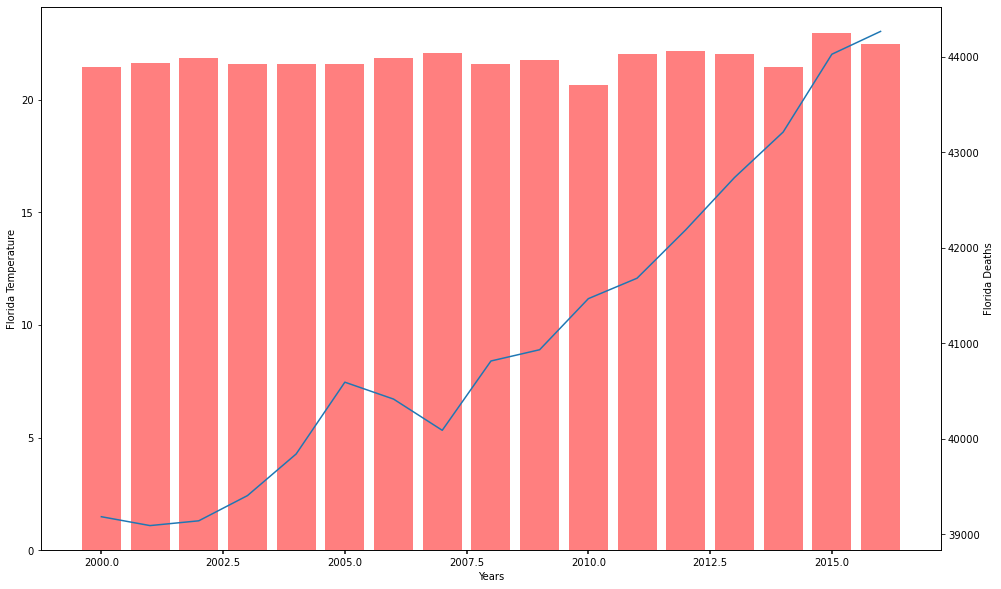

In [35]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
fig.set_figheight(10)
fig.set_figwidth(20)
twin1 = ax.twinx()

ax.bar(annual_change.index, annual_change["tempc"], color="r", label="Temperature",alpha=0.5 )

twin1.plot(annual_change.index, annual_change["Deaths"], label="Deaths")

ylabel = f"{selected_state} Temperature"
twin_ylabel = f"{selected_state} Deaths"
ax.set_xlabel("Years")
ax.set_ylabel(ylabel)
twin1.set_ylabel(twin_ylabel)

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='x', **tkw)

filename=f"../images/{selected_state}.png"
plt.savefig(filename)
# plt.savefig("../images/colorado.png")
plt.show()